# Projeto 3

In [9]:
import pandas as pd
import numpy as np
import re
import string
from IPython.display import display
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
import matplotlib.pyplot as plt

In [10]:
PETR4_raw = pd.read_excel (r'PETR4.SA .xltx')

GOLD_raw = pd.read_excel (r'Gold Futures Historical Data.xltx') 
RDS_raw = pd.read_excel (r'RDS-A.xltx') 
OIL_raw = pd.read_excel (r'Crude Oil WTI Futures Historical Data.xltx')
CRD_raw = pd.read_excel (r'USD_BRL Dados Históricos.xltx')

In [11]:
PETR4 = PETR4_raw[['Date', 'Adj Close']]

GOLD = GOLD_raw[['Date', 'Price']]
RDS = RDS_raw[['Date', 'Adj Close']]
OIL = OIL_raw[['Date', 'Price']]
CRD = CRD_raw[['Data', 'Último']]

Para PETR4:

In [12]:
PETR4_RE = PETR4.rename(columns={"Adj Close": "Valor_PETR4"})
PETR4_REDate = PETR4_RE.assign(Date = PETR4_RE.Date.values[::-1])
PETR4_F = PETR4_REDate.assign(Valor_PETR4 = PETR4_REDate.Valor_PETR4.values[::-1])

Para Gold:

In [13]:
GOLD_F = GOLD.rename(columns={"Price": "Valor_GOLD"})

Para RDS:

In [14]:
RDS_RE = RDS.rename(columns={"Adj Close": "Valor_RDS"})
RDS_REDate = RDS_RE.assign(Date = RDS_RE.Date.values[::-1])
RDS_F = RDS_REDate.assign(Valor_RDS = RDS_REDate.Valor_RDS.values[::-1])

Para OIL:

In [15]:
OIL_F = OIL.rename(columns={"Price": "Valor_OIL"})

Para CRD:

In [16]:
CRD_RE = CRD.rename(columns={"Data": "Date","Último": "Valor_CRD" })

NOVO_VALOR = []
for e in CRD_RE["Valor_CRD"]:
    NOVO_VALOR.append(e/10000)
CRD_RE['Valor_CRD'] = NOVO_VALOR

NOVA_DATA = []
for e in CRD_RE['Date']:
    Separado = e.split(".")
    Correto = Separado[2] + "-" + Separado[1] + "-" + Separado[0]
    NOVA_DATA.append(Correto)
CRD_RE['Date'] = NOVA_DATA 

CRD_F = CRD_RE

Selecionando intervalo a ser estudado e alterando o index:

In [17]:
PETR4_F["Date"] == "2014-11-10" #1240
PETR4_F["Date"] == "2019-10-31" #2
PETR4_DATE = PETR4_F.loc[2: 1240].set_index('Date')

GOLD_F["Date"] == "2014-11-10" #1321
GOLD_F["Date"] == "2019-10-31" #5
GOLD_DATE = GOLD_F.loc[5: 1321].set_index('Date')

RDS_F["Date"] == "2014-11-10" #1256
RDS_F["Date"] == "2019-10-31" #4
RDS_DATE = RDS_F.loc[4: 1256].set_index('Date')

OIL_F["Date"] == "2014-11-10" #1318
OIL_F["Date"] == "2019-10-31" #5
OIL_DATE = OIL_F.loc[5: 1318].set_index('Date')

CRD_F["Date"] == "2014-11-10" #1302
CRD_F["Date"] == "2019-10-31" #4
CRD_DATE = CRD_F.loc[4: 1302].set_index('Date')


In [18]:
U1 = GOLD_DATE.join(PETR4_DATE)
U2 = RDS_DATE.join(U1)
U3 = OIL_DATE.join(U2)
U4 = CRD_DATE.join(U3)
U5 = U4.interpolate()
DADOS = U5.sort_index(ascending=True, axis=0)


In [19]:
DADOS.head(5)

,Valor_CRD,Valor_OIL,Valor_RDS,Valor_GOLD,Valor_PETR4
Date,,,,,
2014-11-10,2.5528,77.40,51.181202,1251.3,13.237089
2014-11-11,2.5575,77.94,51.477970,1255.1,13.256026
2014-11-12,2.5665,77.18,50.531734,1250.4,13.360181
2014-11-13,2.5889,74.21,50.179653,1251.4,12.877283
2014-11-14,2.6018,75.82,50.891159,1275.6,12.498541


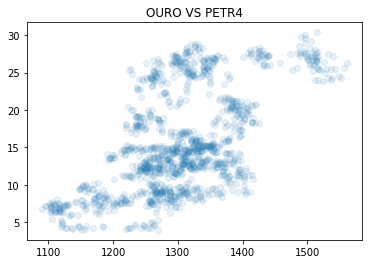

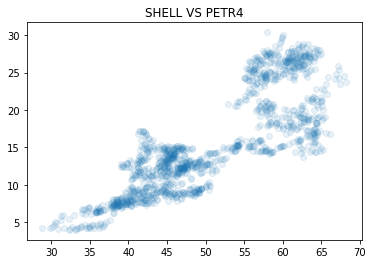

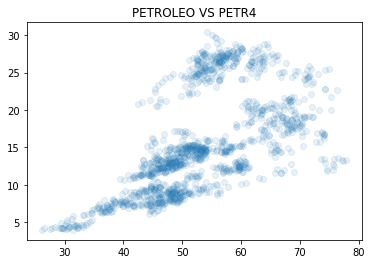

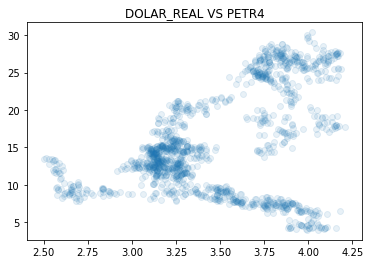

In [20]:
plt.scatter(DADOS['Valor_GOLD'], DADOS['Valor_PETR4'], alpha = 0.1)
plt.title('OURO VS PETR4')
plt.plot()
plt.show()
plt.scatter(DADOS['Valor_RDS'], DADOS['Valor_PETR4'], alpha = 0.1)
plt.title('SHELL VS PETR4')
plt.plot()
plt.show()
plt.scatter(DADOS['Valor_OIL'], DADOS['Valor_PETR4'], alpha = 0.1)
plt.title('PETROLEO VS PETR4')
plt.plot()
plt.show()
plt.scatter(DADOS['Valor_CRD'], DADOS['Valor_PETR4'], alpha = 0.1)
plt.title('DOLAR_REAL VS PETR4')
plt.plot()
plt.show()

In [21]:
i = 0
FAZER1 = []
while i < 1298:
    FAZER1.append((DADOS["Valor_GOLD"][i] - DADOS["Valor_GOLD"][i-1])/DADOS["Valor_GOLD"][i-1])    
    i+=1
    
i = 0
FAZER2 = []
while i < 1298:
    FAZER2.append((DADOS["Valor_RDS"][i] - DADOS["Valor_RDS"][i-1])/DADOS["Valor_RDS"][i-1])    
    i+=1
    
i = 0
FAZER3 = []
while i < 1298:
    FAZER3.append((DADOS["Valor_OIL"][i] - DADOS["Valor_OIL"][i-1])/DADOS["Valor_OIL"][i-1])    
    i+=1    

i = 0
FAZER4 = []
while i < 1298:
    FAZER4.append((DADOS["Valor_CRD"][i] - DADOS["Valor_CRD"][i-1])/DADOS["Valor_CRD"][i-1])    
    i+=1     
    
i = 0
FAZER5 = []
while i < 1298:
    FAZER5.append((DADOS["Valor_PETR4"][i+1] - DADOS["Valor_PETR4"][i])/DADOS["Valor_PETR4"][i])
    i+=1
    

DADOS_OPT = DADOS.iloc[1:1298,:]

del FAZER1[0]
del FAZER2[0]
del FAZER3[0]
del FAZER4[0]
del FAZER5[0]

    
DADOS_OPT['CALC_GOLD'] = FAZER1;
DADOS_OPT['CALC_RDS'] = FAZER2;
DADOS_OPT['CALC_OIL'] = FAZER3;
DADOS_OPT['CALC_CRD'] = FAZER4;
DADOS_OPT['CALC_PETR4'] = FAZER5;

DADOS_OPT.head(5)

C:\Users\Enrico Damiani\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Enrico Damiani\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Enrico Damiani\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

,Valor_CRD,Valor_OIL,Valor_RDS,Valor_GOLD,Valor_PETR4,CALC_GOLD,CALC_RDS,CALC_OIL,CALC_CRD,CALC_PETR4
Date,,,,,,,,,,
2014-11-11,2.5575,77.94,51.477970,1255.1,13.256026,0.003037,0.005798,0.006977,0.001841,0.007857
2014-11-12,2.5665,77.18,50.531734,1250.4,13.360181,-0.003745,-0.018381,-0.009751,0.003519,-0.036145
2014-11-13,2.5889,74.21,50.179653,1251.4,12.877283,0.000800,-0.006968,-0.038481,0.008728,-0.029412
2014-11-14,2.6018,75.82,50.891159,1275.6,12.498541,0.019338,0.014179,0.021695,0.004983,-0.045455
2014-11-17,2.6081,75.64,50.795807,1273.7,11.930425,-0.001489,-0.001874,-0.002374,0.002421,-0.011905


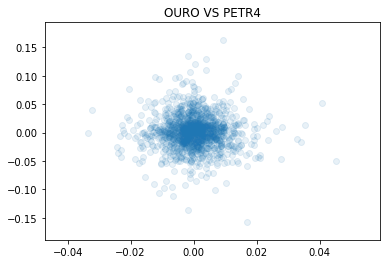

In [22]:
plt.scatter(DADOS_OPT['CALC_GOLD'], DADOS_OPT['CALC_PETR4'], alpha = 0.1)
plt.title('OURO VS PETR4')
plt.plot()
plt.show()




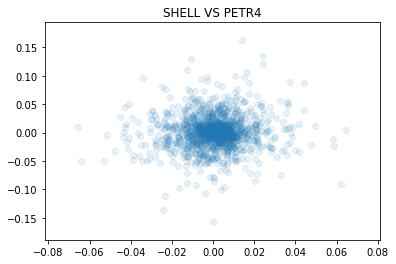

In [23]:

plt.scatter(DADOS_OPT['CALC_RDS'], DADOS_OPT['CALC_PETR4'], alpha = 0.1)
plt.title('SHELL VS PETR4')
plt.plot()
plt.show()

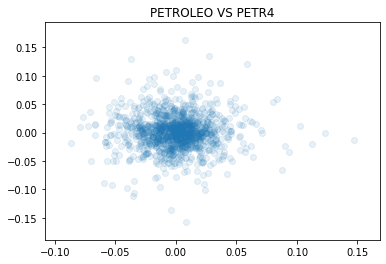

In [24]:

plt.scatter(DADOS_OPT['CALC_OIL'], DADOS_OPT['CALC_PETR4'], alpha = 0.1)
plt.title('PETROLEO VS PETR4')
plt.plot()
plt.show()

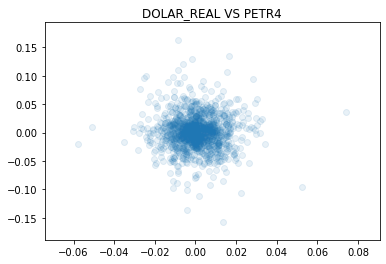

In [25]:

plt.scatter(DADOS_OPT['CALC_CRD'], DADOS_OPT['CALC_PETR4'], alpha = 0.1)
plt.title('DOLAR_REAL VS PETR4')

plt.plot()
plt.show()

TESTES

In [26]:

from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=1000)

parameter_space = {
    'hidden_layer_sizes': [(500, 30, 5), (800, 40), (1000, 300, 20)],
    'activation': ['identity','logistic','tanh'],
    'solver': ['lbfgs','sgd', 'adam'],
    'alpha': [1e-5],
    'learning_rate': ['constant','adaptive'],
    'n_iter_no_change' : [20]
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=None,  refit=True,  verbose=True, return_train_score=True)
clf.fit(X, y)


NameError: name 'X' is not defined

In [ ]:
predictionsrf = clf.predict(X_test)

b = []
for e in predictionsrf:
    b.append(e)

e =0
i = 0
while i < len(b):
    if b[i] <= (y_test[i] + y_test[i]*0.5) and b[i] >= (y_test[i] - y_test[i]*0.5) :
        e += 1
    i += 1
    
print (e)

In [ ]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [27]:
y_true, y_pred = y_test , clf.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

NameError: name 'y_test' is not defined

In [28]:
import random 
random.randint(1,1300)

1208

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
import random 

mlp = MLPRegressor(max_iter=1000)

param_distributions = {'hidden_layer_sizes': [(random.randint(1,1300), random.randint(1,1300), random.randint(1,1300), random.randint(1,1300), random.randint(1,1300), random.randint(1,1300))],
    'activation': ['identity','logistic','tanh'],
    'solver': ['lbfgs','sgd', 'adam'],
    'alpha': [1e-5, 0.005],
    'learning_rate': ['constant','adaptive'],
    'tol' : [1e-5, 1e-6, 1e-7],
    'n_iter_no_change' : [30]    
}

g = RandomizedSearchCV(mlp, param_distributions, n_iter=100, scoring= 'r2',cv = 10, n_jobs=None, verbose=True, random_state=42, error_score='raise-deprecating')
g.fit(X3_train, y3_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Enrico Damiani\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Enrico Damiani\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Enrico Damiani\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Enrico Damiani\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stoch

C:\Users\Enrico Damiani\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Enrico Damiani\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Enrico Damiani\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Enrico Damiani\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't co

C:\Users\Enrico Damiani\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Enrico Damiani\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Enrico Damiani\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Enrico Damiani\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't co

C:\Users\Enrico Damiani\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Enrico Damiani\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Enrico Damiani\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Enrico Damiani\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't co

C:\Users\Enrico Damiani\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Enrico Damiani\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Enrico Damiani\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Enrico Damiani\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't co

In [1]:
# Best paramete set
print('Best parameters found:\n', g.best_params_)

# All results
means = g.cv_results_['mean_test_score']
stds = g.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, g.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

NameError: name 'g' is not defined

ALGORITIMO

In [29]:
X = DADOS_OPT.iloc[:,5:9]
y = DADOS_OPT['CALC_PETR4']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
X2 = DADOS.iloc[:,0:4]
y2 = DADOS['Valor_PETR4']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.20)
scaler = StandardScaler()
scaler.fit(X_train)

X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [33]:
X3_train = DADOS_OPT.iloc[:800,5:9]
y3_train = DADOS_OPT['CALC_PETR4'].iloc[:800,]

X3_test = DADOS_OPT.iloc[800:,5:9]
y3_test = DADOS_OPT['CALC_PETR4'].iloc[800:,]

scaler = StandardScaler()
scaler.fit(X3_train)

X3_train = scaler.transform(X3_train)
X3_test = scaler.transform(X3_test)

Random Forest - DADOS_OPT

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train.values.ravel());

In [35]:
predictionsrf = rf.predict(X_test)

b = []
for e in predictionsrf:
    b.append(e)

e =0
i = 0
while i < len(b):
    if b[i] <= (y_test[i] + 0.01) and b[i] >= (y_test[i] -0.01):
        e += 1
    i += 1
    
print (e)


76


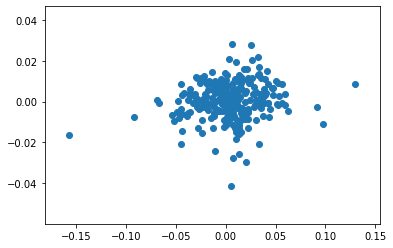

In [56]:
plt.scatter(y_test,b)
plt.plot()
plt.show()

In [55]:
from sklearn.ensemble import RandomForestRegressor

rf2 = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf2.fit(X_train2, y_train2.values.ravel());
predictionsrf2 = rf2.predict(X_test2)

b2 = []
for e in predictionsrf2:
    b2.append(e)

e =0
i2 = 0
while i2 < len(b2):
    if b2[i2] <= (y_test2[i2] + 0.01) and b2[i2] >= (y_test2[i2] - 0.01) :
        e += 1
    i2 += 1
    
print (e)

5


ValueError: x and y must be the same size

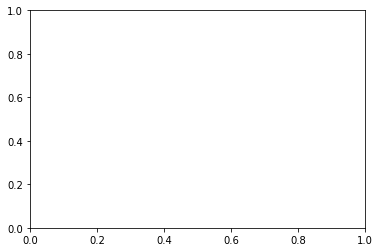

In [48]:
plt.scatter(y_test2,b2)

In [51]:
from sklearn.ensemble import RandomForestRegressor

rf3 = RandomForestRegressor(n_estimators = 3000, random_state = 42)

rf3.fit(X3_train, y3_train.values.ravel());
predictionsrf3 = rf3.predict(X3_test)

b3 = []
for e in predictionsrf3:
    b3.append(e)

e =0
i3 = 0
while i3 < len(b3):
    if b3[i3] <= (y3_test[i3] + 0.01) and b3[i3] >= (y3_test[i3] - 0.01) :
        e += 1
    i3 += 1
    
print (e)

186


In [54]:
188/len(y3_test)

0.3782696177062374

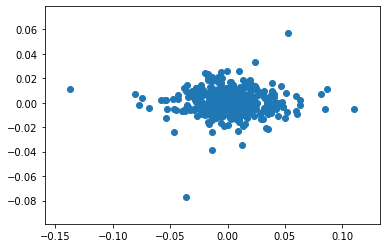

In [40]:
plt.scatter(y3_test,b3)

MLP

In [41]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor ( hidden_layer_sizes = (866, 25, 300, 10, 750, 250, 20, 80, 6), activation='logistic', solver='sgd',verbose = True, alpha = 1e-6, max_iter = 500,tol = 1e-6, random_state = 42, n_iter_no_change=20)
mlp.fit(X_train, y_train.values.ravel())



Iteration 1, loss = 0.03070351
Iteration 2, loss = 0.02691625
Iteration 3, loss = 0.02197836
Iteration 4, loss = 0.01716493
Iteration 5, loss = 0.01304723
Iteration 6, loss = 0.00973984
Iteration 7, loss = 0.00720920
Iteration 8, loss = 0.00531317
Iteration 9, loss = 0.00392141
Iteration 10, loss = 0.00291740
Iteration 11, loss = 0.00219381
Iteration 12, loss = 0.00167736
Iteration 13, loss = 0.00131244
Iteration 14, loss = 0.00105839
Iteration 15, loss = 0.00088032
Iteration 16, loss = 0.00075289
Iteration 17, loss = 0.00066243
Iteration 18, loss = 0.00060130
Iteration 19, loss = 0.00055499
Iteration 20, loss = 0.00052293
Iteration 21, loss = 0.00050191
Iteration 22, loss = 0.00048657
Iteration 23, loss = 0.00047591
Iteration 24, loss = 0.00046871
Iteration 25, loss = 0.00046343
Iteration 26, loss = 0.00045994
Iteration 27, loss = 0.00045771
Iteration 28, loss = 0.00045620
Iteration 29, loss = 0.00045496
Iteration 30, loss = 0.00045397
Iteration 31, loss = 0.00045329
Iteration 32, los

MLPRegressor(activation='logistic', alpha=1e-06, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(866, 25, 300, 10, 750, 250, 20, 80, 6),
             learning_rate='constant', learning_rate_init=0.001, max_iter=500,
             momentum=0.9, n_iter_no_change=20, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='sgd',
             tol=1e-06, validation_fraction=0.1, verbose=True,
             warm_start=False)

In [42]:
predictionsmlp = mlp.predict(X_test)

a = []
for e in predictionsmlp:
    a.append(e)

e =0
i = 0
while i < len(a):
    if a[i] <= (y_test[i] + y_test[i]*0.25) and a[i] >= (y_test[i] - y_test[i]*0.25) :
        e += 1
    i += 1
    
print (e)

1


In [43]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))
print(mlp.loss_)


Training set score: -0.000000
Test set score: -0.011408
0.00045164781063345046


[]

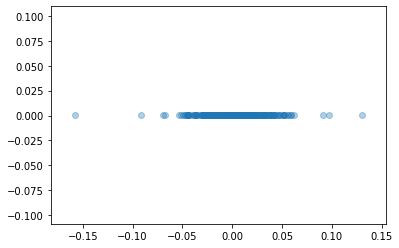

In [44]:
plt.scatter(y_test, a, alpha = 0.35)
plt.axis('equal')
plt.plot()

In [45]:
{'solver': 'adam', 'n_iter_no_change': 20, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (324, 738, 351, 1098), 'alpha': 1e-05, 'activation': 'logistic'}
                        
mlp3 = MLPRegressor(hidden_layer_sizes = (866, 100, 20), activation = 'relu', solver = 'adam',verbose = True, alpha = 1e-6, max_iter = 5000,tol = 1e-5, random_state = 42, n_iter_no_change=36)

mlp3 = MLPRegressor(hidden_layer_sizes = (866, 100, 50), activation = 'relu', solver = 'adam',verbose = True, alpha = 1e-6, max_iter = 5000,tol = 1e-5, random_state = 42, n_iter_no_change=10)


In [46]:
from sklearn.neural_network import MLPRegressor
mlp3 = MLPRegressor(hidden_layer_sizes = (324, 738, 351, 1098), learning_rate =  'adaptive', activation = 'logistic', solver = 'adam',verbose = True, alpha = 1e-5, max_iter = 5000,tol = 1e-5, random_state = 42, n_iter_no_change=20)
mlp3.fit(X3_train, y3_train.values.ravel())

Iteration 1, loss = 0.41535901
Iteration 2, loss = 0.32956246
Iteration 3, loss = 0.07153490
Iteration 4, loss = 0.08787165
Iteration 5, loss = 0.01487753
Iteration 6, loss = 0.04655164
Iteration 7, loss = 0.00636384
Iteration 8, loss = 0.01849148
Iteration 9, loss = 0.00625569
Iteration 10, loss = 0.00642753
Iteration 11, loss = 0.00429505
Iteration 12, loss = 0.00247329
Iteration 13, loss = 0.00253101
Iteration 14, loss = 0.00137824
Iteration 15, loss = 0.00145773
Iteration 16, loss = 0.00095305
Iteration 17, loss = 0.00089482
Iteration 18, loss = 0.00076656
Iteration 19, loss = 0.00066617
Iteration 20, loss = 0.00070225
Iteration 21, loss = 0.00061293
Iteration 22, loss = 0.00066007
Iteration 23, loss = 0.00058730
Iteration 24, loss = 0.00061087
Iteration 25, loss = 0.00058280
Iteration 26, loss = 0.00058298
Iteration 27, loss = 0.00057629
Iteration 28, loss = 0.00056920
Iteration 29, loss = 0.00057068
Iteration 30, loss = 0.00056933
Iteration 31, loss = 0.00056953
Iteration 32, los

MLPRegressor(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(324, 738, 351, 1098), learning_rate='adaptive',
             learning_rate_init=0.001, max_iter=5000, momentum=0.9,
             n_iter_no_change=20, nesterovs_momentum=True, power_t=0.5,
             random_state=42, shuffle=True, solver='adam', tol=1e-05,
             validation_fraction=0.1, verbose=True, warm_start=False)

In [47]:
predictionsmlp2 = mlp3.predict(X3_test)

b2 = []
for e in predictionsmlp2:
    b2.append(e)

e =0
i2 = 0
while i2 < len(b2):
    if b2[i2] <= (y3_test[i2] + 0.01) and b2[i2] >= (y3_test[i2] - 0.01) :
        e += 1
    i2 += 1
    
print (e)

201


In [110]:
if b2[3] <= (y3_test[3] + 0.01) and b2[3] >= (y3_test[3] - 0.01) :
        print('true')
print(y3_test[3], b2[100])

true
0.0019544130372545 0.008768648761033643


In [132]:
mlp3.predict(X3_test)

array([-6.24099867e-03,  2.77087107e-02,  2.23699857e-02,  1.42629440e-02,
        1.48534641e-02,  1.20371409e-02,  4.71489583e-03,  1.88050220e-03,
        5.40850419e-03,  5.81842537e-04,  1.48574926e-03,  9.40919559e-03,
        1.71587047e-02, -1.95994564e-03, -7.20332355e-03, -3.01845797e-03,
       -5.67244640e-03, -8.52040754e-04, -1.71193489e-03,  2.96120119e-03,
        7.69030030e-03, -2.52503236e-03, -5.13867003e-03, -6.76022458e-04,
        3.29975326e-03,  1.20570164e-02,  1.40667551e-02,  5.20418596e-03,
        2.18087500e-02,  2.25901396e-03,  1.34179151e-02, -8.53118004e-03,
       -1.00799415e-02, -2.04561660e-02,  1.48237208e-02,  9.94681646e-04,
        4.88553808e-02, -1.23515285e-02,  1.39862263e-02, -4.89860410e-03,
        1.56641956e-03, -1.01881234e-02, -1.72961867e-02, -3.75636813e-02,
        6.66290073e-03,  1.31992351e-02, -4.21843852e-03,  1.18309100e-02,
        2.35307248e-02,  5.21743655e-03, -1.23697019e-02,  6.97454176e-03,
        1.02841722e-02,  

[]

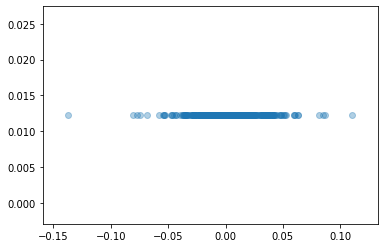

In [54]:
plt.scatter(y3_test, b2, alpha = 0.35)
plt.plot()

# predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
len(predictions)

NameError: name 'predictions' is not defined

In [163]:
e/len(b2)

0.4044265593561368

In [165]:
e =0
i2 = 0
while i2 < len(b2):
    if b2[i2] >=0  and y3_test[i2] >= 0:
        e += 1
    elif b2[i2] <=0  and y3_test[i2] <= 0:
        e += 1
    i2 += 1
    
print (e)

271


In [166]:
e/len(b2)

0.545271629778672

In [168]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y3_test, predictionsmlp2, multioutput='uniform_average')

3.683669015486224e-06